# Multilayer perceptron example

This Jupyter notebook has as goal to show the use the Multilayer-perceptron class `mlp.py` provided in this repository. The implementation of the MLP has didactic purposes in other words is not optimized, but well commented. It is mostly based on the lectures for weeks 4 and 5 (neural networks) in the the MOOC [Machine Learning](https://www.coursera.org/learn/machine-learning#%20) taught by from Andrew Ng and notes from the chapter 6 (deep forward networks) from the [Deep Learning](http://www.deeplearningbook.org/).  


In [97]:
%matplotlib notebook
import numpy as np
import pickle, gzip
import mlp
import matplotlib.pyplot as plt

## 1. Loading dataset
The dataset utilzied for this example can be downloaded from [http://deeplearning.net/data/mnist/mnist.pkl.gz](http://deeplearning.net/data/mnist/mnist.pkl.gz) and consist of a subset (20k examples) of the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). 

In [98]:
# As 'mnist.pkl.gz' was created in Python2, 'latin1' encoding is needed to loaded in Python3
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

The dataset contains 70K examples divided as: 50k for training, 10k for validation and 10k for testing.
Each example is a 28x28 pixel grayimages containing a digit. Some examples of the database:

<IPython.core.display.Javascript object>


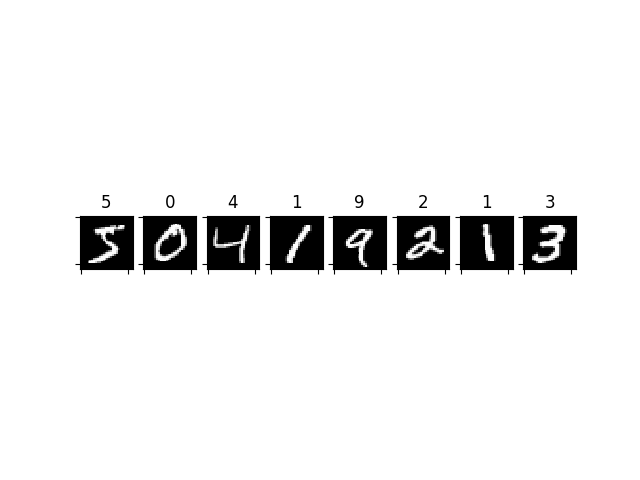

In [99]:
# Plot random examples
examples = np.random.randint(10000, size=8)
n_examples = len(examples)
plt.figure()
for ix_example in range(n_examples):
    tmp = np.reshape(train_set[0][ix_example,:], [28,28])
    ax = plt.subplot(1,n_examples, ix_example + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(train_set[1][ix_example]))
    plt.imshow(tmp, cmap='gray')

For sake of time, the MLP is trained with the validation set (10K examples); testing is performed with the test set (10K examples)

In [100]:
# Training data
train_X = valid_set[0]
train_y = valid_set[1]  
print('Shape of training set: ' + str(train_mlp_X.shape))
# Test data
test_X = test_set[0]
test_y = test_set[1] 
print('Shape of test set: ' + str(train_mlp_X.shape))


Shape of training set: (10000, 784)
Shape of test set: (10000, 784)


## 2. Parameters of MLP
 * __Number of layers__ : 4 (input, hidden1, hidden2 output)
 * __Elements in layers__ : [784, 64, 10, 10]   
 * __Activation function__ : Rectified Linear function
 * __Regularization parameter__ : 1 

In [101]:
size_layers = [784, 25, 10, 10]
activation_funct = 'relu'
reg_lambda = 1

## 3. Creating MLP object

In [102]:
mlp_classifier = mlp.Mlp(size_layers, activation_funct, reg_lambda)
print(mlp_classifier)

## 4. Training MLP

In [103]:
# Training with Backpropagation and 100 iterations
mlp_classifier.train(train_mlp_X, train_mlp_y, 200)
# Training Accuracy
y_hat = mlp_classifier.predict(train_mlp_X)
acc = np.mean(1 * (y_hat == train_mlp_y))
print('Training Accuracy: ' + str(acc*100))

Training Accuracy: 92.02


## 5. Testing MLP

In [104]:
# Test Accuracy
y_hat = mlp_classifier.predict(test_mlp_X)
acc = np.mean(1 * (y_hat == test_mlp_y))
print('Testing Accuracy: ' + str(acc*100))  

Testing Accuracy: 89.56


## 6.  Plotting some weights
#### A. Weights from Input layer to Hidden layer 1

<IPython.core.display.Javascript object>


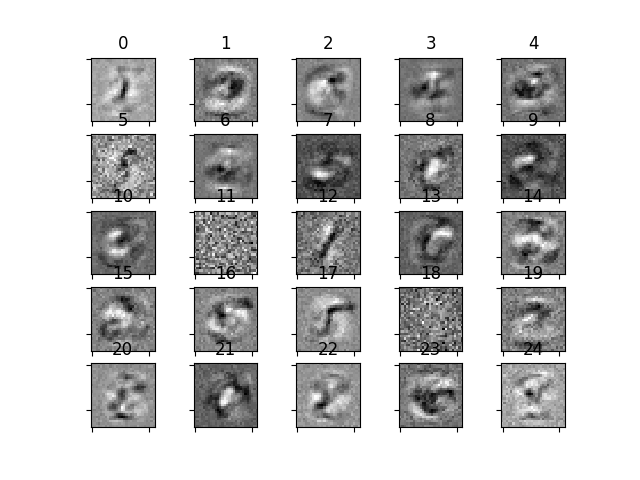

In [105]:
w1 = mlp_classifier.theta_weights[0][:,1:]
plt.figure()
for ix_w in range(25):
    tmp = np.reshape(w1[ix_w,:], [28,28])
    ax = plt.subplot(5,5, ix_w + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(ix_w))
    plt.imshow(1- tmp, cmap='gray')

#### A. Weights from Input layer to Hidden layer 1

<IPython.core.display.Javascript object>


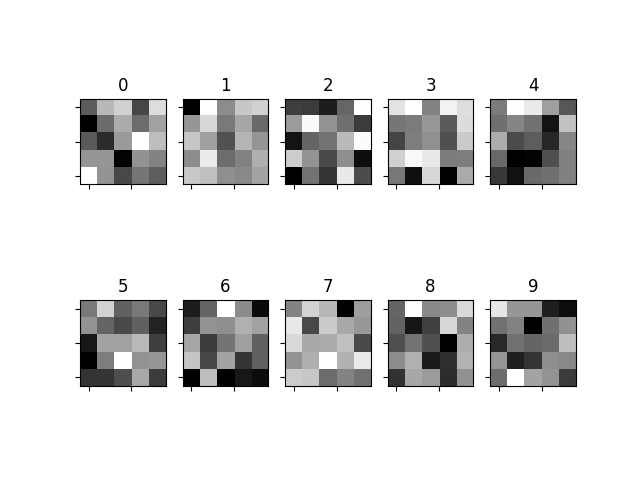

In [106]:
w2 =  mlp_classifier.theta_weights[1][:,1:]
plt.figure()
for ix_w in range(10):
    tmp = np.reshape(w2[ix_w,:], [5,5])
    ax = plt.subplot(2,5, ix_w + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(ix_w))
    plt.imshow(1- tmp, cmap='gray')